In [1]:
import pandas as pd
import numpy as np

In [2]:
salary = pd.read_csv("C:\\Users\\HP\\Desktop\\DT\\dataset\\employee_data.csv")

In [3]:
salary.head(10)

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574
5,5,5,O,42,5,3,2761
6,6,6,AB,53,4,6,1484
7,7,7,B,41,8,6,3809
8,8,8,A,47,5,6,2065
9,9,9,A,31,4,8,1020


In [4]:
salary.describe()

,Unnamed: 0,id,age,healthy_eating,active_lifestyle,salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,499.500000,41.155000,4.944000,5.683000,2227.46100
std,288.819436,288.819436,13.462995,2.013186,2.048587,1080.20976
min,0.000000,0.000000,18.000000,0.000000,0.000000,553.00000
25%,249.750000,249.750000,30.000000,4.000000,4.000000,1360.00000
50%,499.500000,499.500000,41.000000,5.000000,6.000000,2174.00000
75%,749.250000,749.250000,53.000000,6.000000,7.000000,2993.75000
max,999.000000,999.000000,64.000000,10.000000,10.000000,5550.00000


In [5]:
salary.columns

Index(['Unnamed: 0', 'id', 'groups', 'age', 'healthy_eating',
       'active_lifestyle', 'salary'],
      dtype='object')

In [6]:
salary.shape

(1000, 7)

In [7]:
salary.isnull().any()

Unnamed: 0          False
id                  False
groups              False
age                 False
healthy_eating      False
active_lifestyle    False
salary              False
dtype: bool

In [8]:
salary.dtypes 

Unnamed: 0           int64
id                   int64
groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
salary               int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Unnamed: 0          1000 non-null int64
id                  1000 non-null int64
groups              1000 non-null object
age                 1000 non-null int64
healthy_eating      1000 non-null int64
active_lifestyle    1000 non-null int64
salary              1000 non-null int64
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


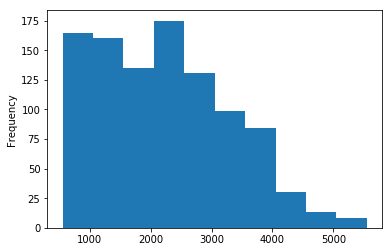

In [13]:
salary.salary.plot.hist();

In [14]:
salary.columns.values

array(['Unnamed: 0', 'id', 'groups', 'age', 'healthy_eating',
       'active_lifestyle', 'salary'], dtype=object)

In [17]:
per=salary[['groups','active_lifestyle']].groupby(['groups']).agg('median')
per

,active_lifestyle
groups,
A,6
AB,6
B,6
O,6


In [44]:
data= salary[['groups','healthy_eating']].groupby(['groups']).agg('median')

In [45]:
data

,healthy_eating
groups,
A,5
AB,5
B,5
O,5


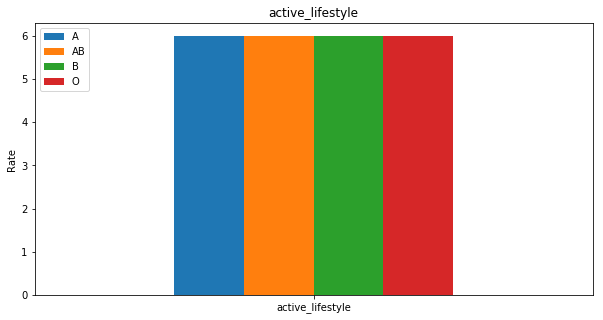

In [20]:
per.T.plot(kind="bar",figsize=(10
                               ,5));
plt.title("active_lifestyle");
plt.ylabel("Rate");
plt.legend(loc="upper left")
plt.xticks(rotation=0);

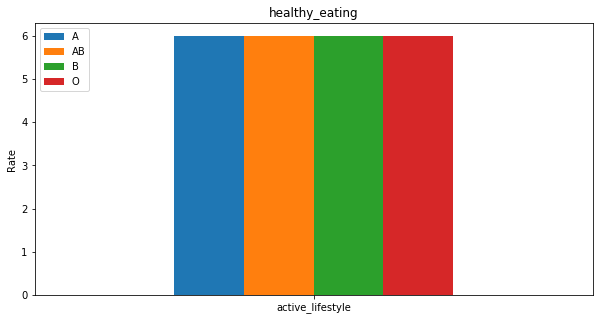

In [21]:
per.T.plot(kind="bar",figsize=(10
                               ,5));
plt.title("healthy_eating");
plt.ylabel("Rate");
plt.legend(loc="upper left")
plt.xticks(rotation=0);

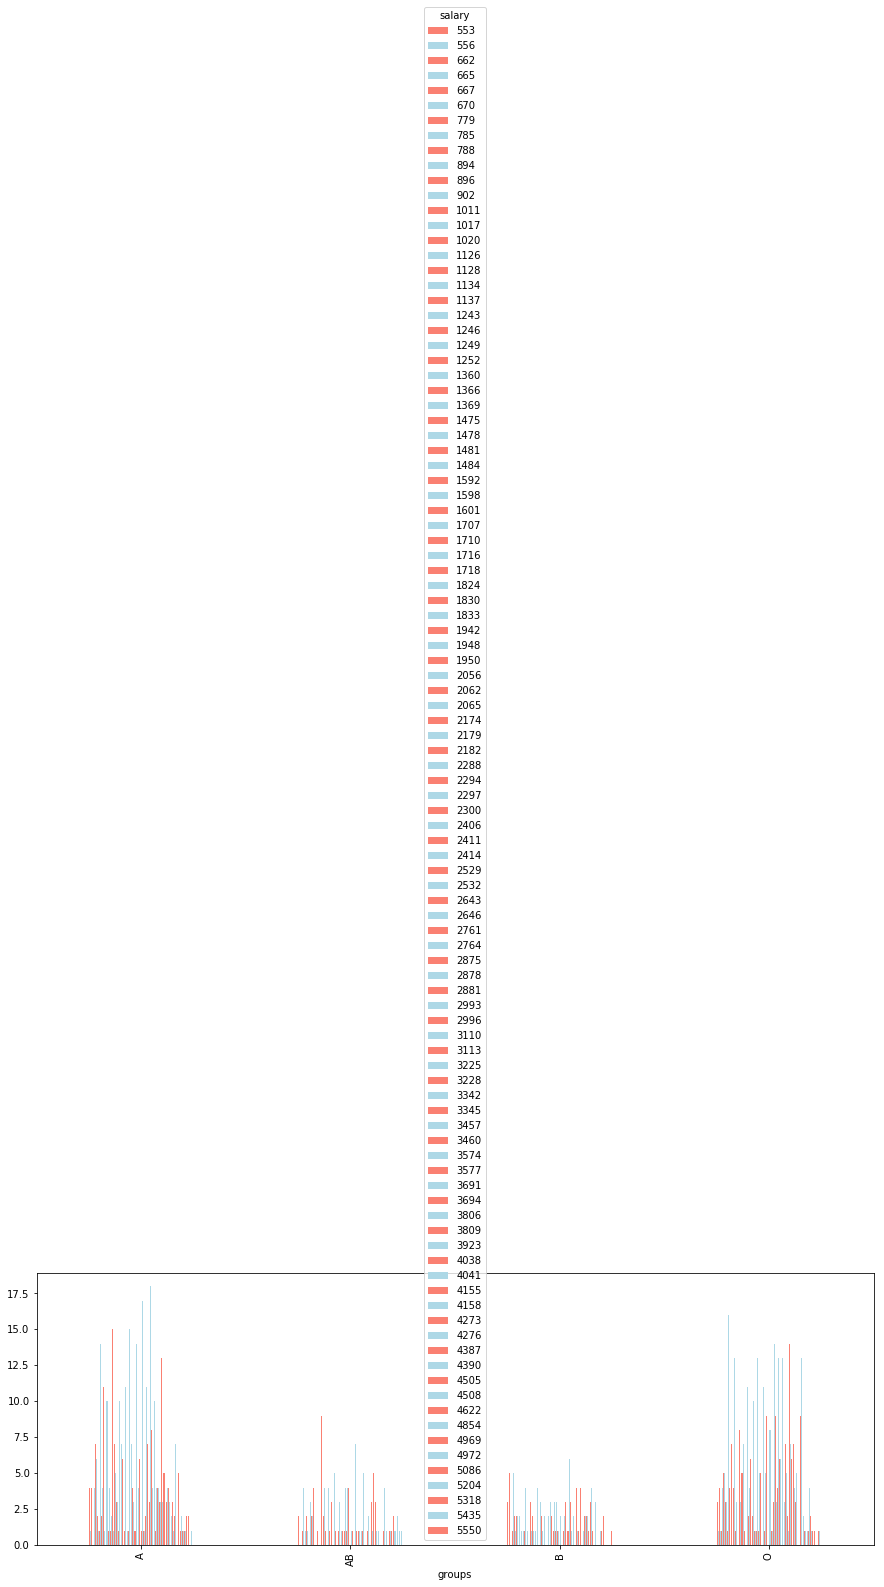

In [24]:
pd.crosstab(salary.groups, salary.salary).plot(kind="bar", figsize=(15,5), color=["salmon", "lightblue"])

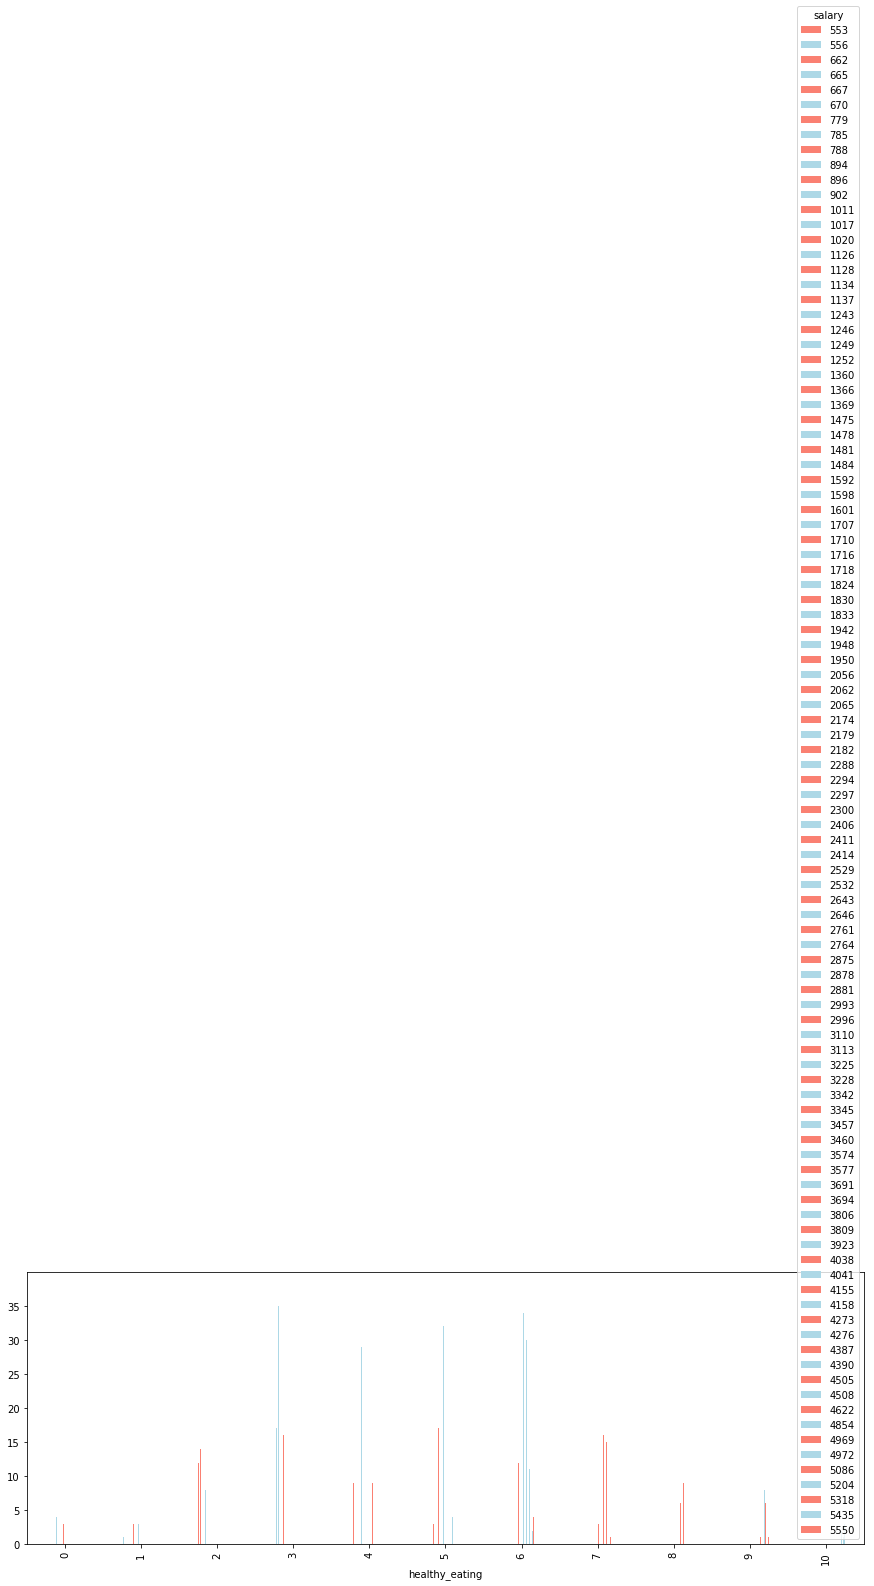

In [25]:

pd.crosstab(salary.healthy_eating, salary.salary).plot(kind="bar", figsize=(15,5), color=["salmon", "lightblue"])


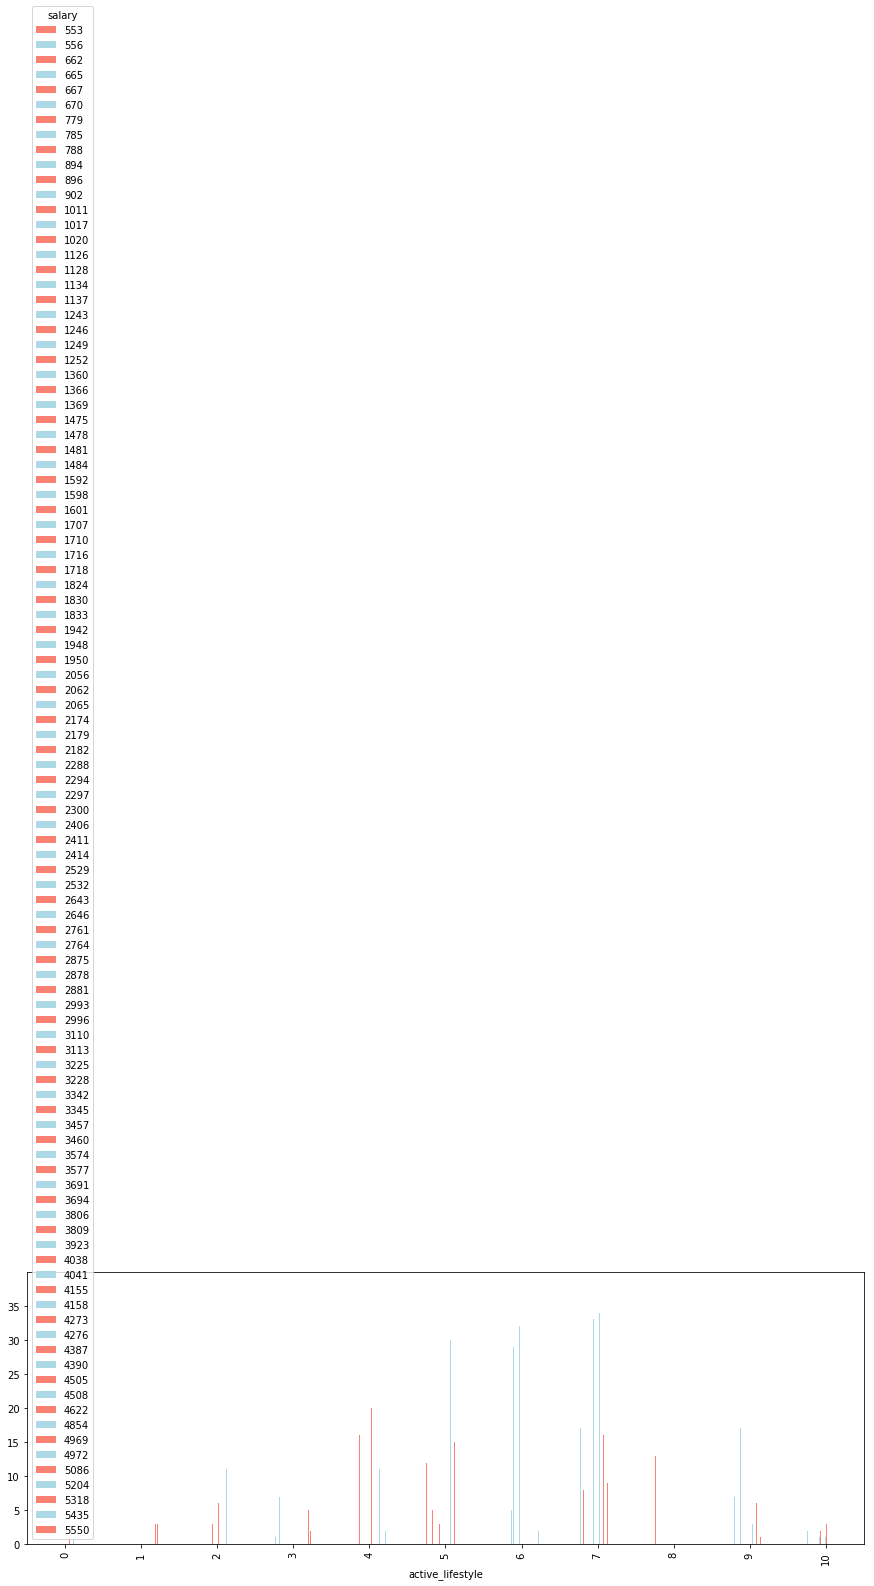

In [26]:
pd.crosstab(salary.active_lifestyle	, salary.salary).plot(kind="bar", figsize=(15,5), color=["salmon", "lightblue"])

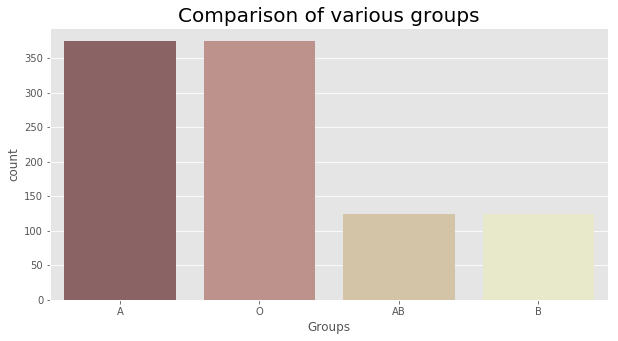

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.countplot(salary['groups'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count');

In [29]:
per=salary[['groups','salary']].groupby(['groups']).agg('sum')
per

,salary
groups,
A,816083
AB,282711
B,279097
O,849570


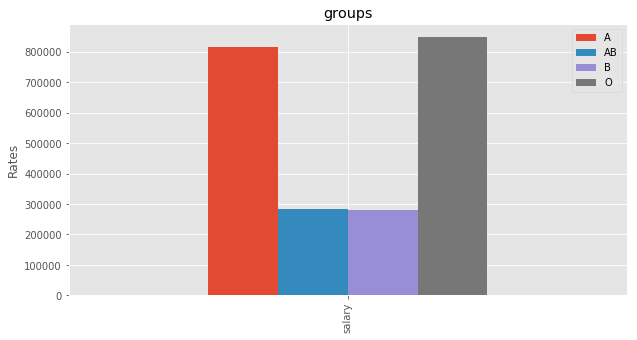

In [30]:
per.T.plot(kind="bar",figsize=(10,5));
plt.title("groups");
plt.ylabel("Rates");
plt.legend(loc="upper right");

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error

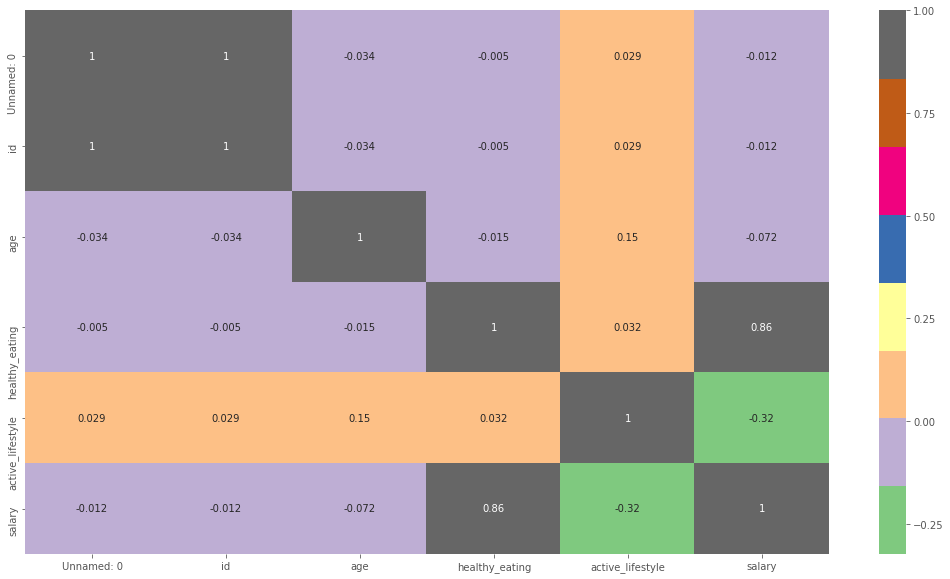

<Figure size 432x288 with 0 Axes>

In [39]:
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = salary.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()
plt.savefig("main_correlation.png")

In [41]:
label = ["salary"]
features = ['age','groups','healthy_eating','active_lifestyle','id']

In [42]:
featured_data = salary.loc[:,features+label]
featured_data = featured_data.dropna(axis=0)
featured_data.shape

(1000, 6)

In [43]:
X = featured_data.loc[:,features]
y = featured_data.loc[:,label]

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.55)

In [ ]:
df = Ridge(alpha=0.000001)
df.fit(X_train,y_train)
y_pred = df.predict(X_test)
c=[]
for i in range(len(y_pred)):
    c.append((y_pred[i][0].round(5)))
pf=c[:3000]

print(len(c),len(pf),c[0])